In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv("datasets/bodyfat.csv")
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [4]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [5]:
data.dropna()
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [6]:
chest_to_hip = data['Chest']/data['Hip']
BMI = (data['Weight']/0.45)/(data['Height']*0.0254)**2


In [7]:
data['chest/hip'] = chest_to_hip
data['BMI'] = BMI
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,chest/hip,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0.985185,115.751500
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0.948328,114.318783
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0.965726,120.856221
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.005929,121.907043
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0.954858,125.013758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,1.004505,103.011270
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,1.038278,142.307466
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,1.092429,147.670176
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,1.107362,132.192363


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Density      0
BodyFat      0
Age          0
Weight       0
Height       0
Neck         0
Chest        0
Abdomen      0
Hip          0
Thigh        0
Knee         0
Ankle        0
Biceps       0
Forearm      0
Wrist        0
chest/hip    0
BMI          0
dtype: int64

In [10]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'chest/hip', 'BMI'],
      dtype='object')

In [11]:
X = data[['BMI','chest/hip','BodyFat']]

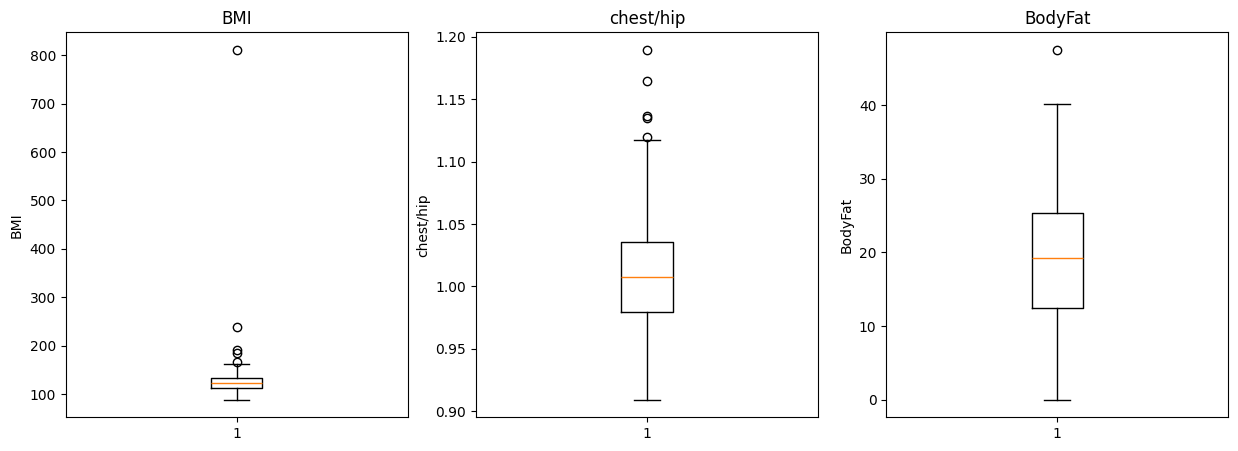

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

for j, column in enumerate(X.columns):
    ax[j].boxplot(X[column])
    ax[j].set_ylabel(column)
    ax[j].set_title(f"{column}")

plt.show()


In [13]:
data_or = data[(data['BMI'] <= 160) &
               (data['chest/hip'] <= 1.10) &
               (data['BodyFat'] <= 40)]

In [14]:
X = data_or[['BMI','chest/hip','BodyFat']]

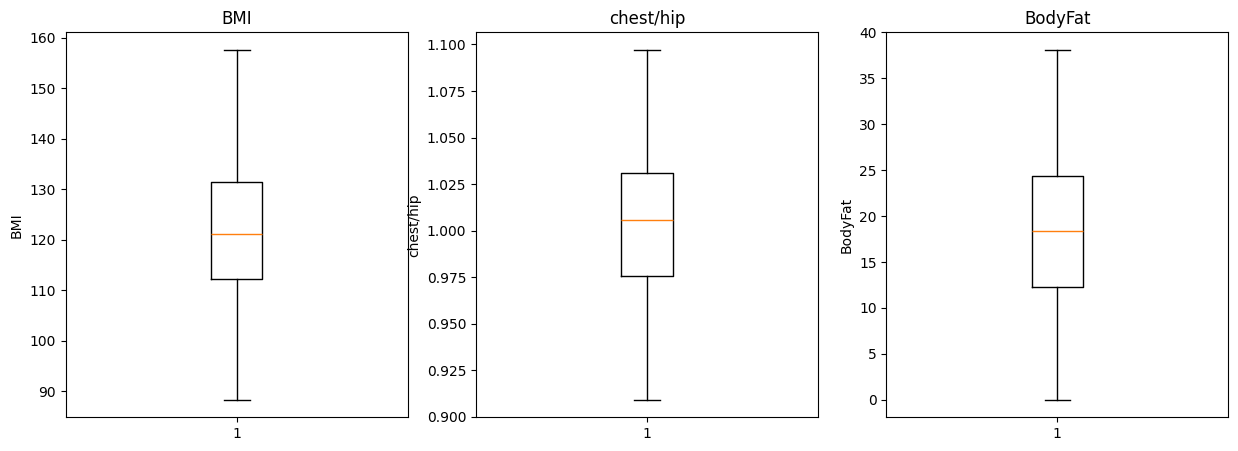

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

for j, column in enumerate(X.columns):
    ax[j].boxplot(X[column])
    ax[j].set_ylabel(column)
    ax[j].set_title(f"{column}")

plt.show()

c:\Users\Bim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Bim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Bim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Bim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



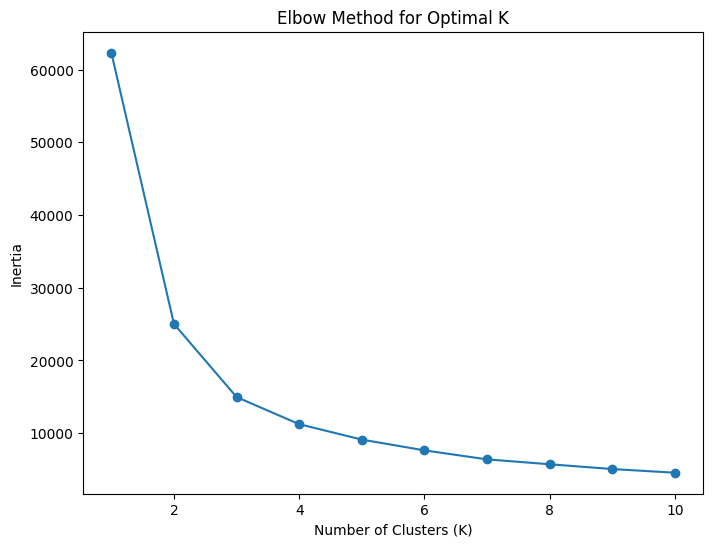

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [52]:
X = X.values

In [53]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create an interactive 3D scatter plot
fig = go.Figure()

# Scatter plot for data points
fig.add_trace(go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(color=labels, colorscale='viridis', size=5),
    name='Data Points'
))

# Scatter plot for cluster centers
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Cluster Centers'
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis=dict(title='BMI'),
        yaxis=dict(title='chest/hip'),
        zaxis=dict(title='BodyFat'),
    ),
    title='K-means Clustering in 3D',
    scene_camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64)),
)


# Show the interactive plot
fig.show()
fig.write_html('interactive_3d_plot.html')

c:\Users\Bim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
for cluster_id, center in enumerate(centers):
    print(f"Center for Cluster {cluster_id}: {center}")

Center for Cluster 0: [123.05190895   1.00906058  20.21632653]
Center for Cluster 1: [141.99881409   1.0195613   25.83454545]
Center for Cluster 2: [107.3998928    0.98773423  10.84814815]


In [55]:
labels

array([2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1])

In [56]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# To load the model and cluster assignments later:
loaded_kmeans = joblib.load('kmeans_model.pkl')

In [57]:
predicted_cluster = loaded_kmeans.predict(([[140,1.7,34]]))

print(f"The new input belongs to cluster {predicted_cluster[0]}")

The new input belongs to cluster 1


In [58]:
data_or

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,chest/hip,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0.985185,115.751500
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0.948328,114.318783
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0.965726,120.856221
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.005929,121.907043
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0.954858,125.013758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1.0308,30.2,69,215.50,70.50,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8,1.033636,149.344452
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,1.004505,103.011270
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,1.038278,142.307466
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,1.092429,147.670176


<Axes: xlabel='Height', ylabel='Count'>

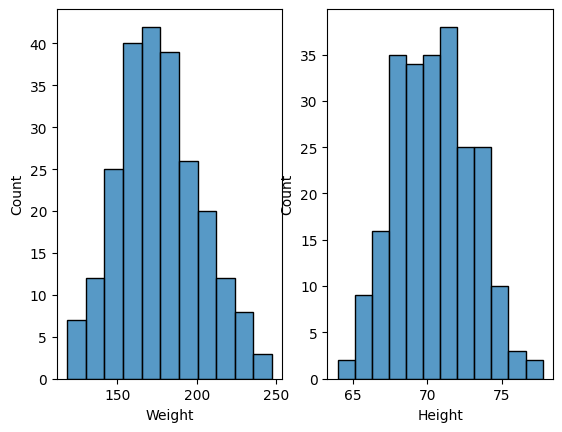

In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2)
sns.histplot(data_or,x='Weight',ax=ax[0])
sns.histplot(data_or,x='Height',ax=ax[1])

In [60]:
import pandas as pd

bmi_data = pd.read_csv("datasets/bmi.csv")
bmi_data = bmi_data.drop('BmiClass', axis=1)
bmi_data

,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,60,1.71,79.02,27.023700
2,60,1.55,74.70,31.092612
3,60,1.46,35.90,16.841809
4,60,1.58,97.10,38.896010
...,...,...,...,...
736,34,1.86,95.70,27.662157
737,44,1.91,106.90,29.302925
738,25,1.82,88.40,26.687598
739,35,1.88,98.50,27.868945


In [61]:
groupby_age = bmi_data.groupby('Age').agg(height = pd.NamedAgg('Height','mean'),
                                          Weight = pd.NamedAgg('Weight','mean')).reset_index()

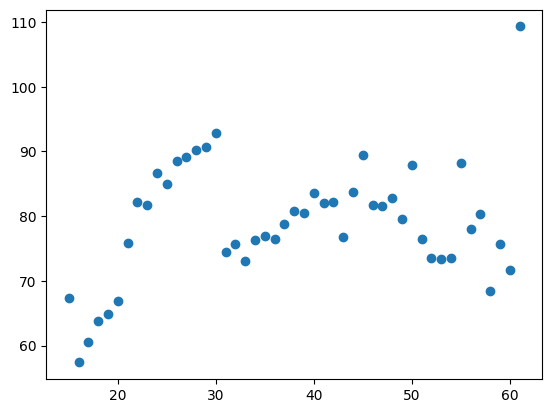

In [62]:
from matplotlib import pyplot as plt

plt.scatter(groupby_age['Age'],groupby_age['Weight'])
plt.show()

Training Mean Squared Error: 72.70222789612912
Test Mean Squared Error: 50.92781839583674


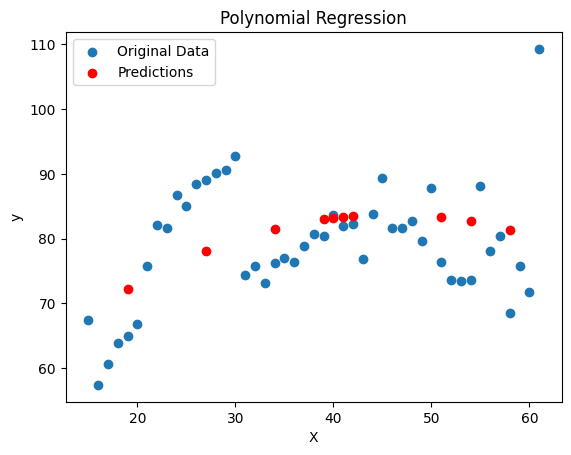

['polynomial_regression_model.joblib']

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = groupby_age['Age'].values.reshape(-1,1)
y = groupby_age['Weight'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_poly_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")

# Create polynomial features for the test set
X_poly_test = poly_features.transform(X_test)

# Make predictions on the test data
y_test_pred = model.predict(X_poly_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse_test}")

# Plot the results
plt.scatter(X, y, label='Original Data')
plt.scatter(X_test, y_test_pred, label='Predictions', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

import joblib

joblib.dump(model, 'polynomial_regression_model.joblib')
